#Practice 01. Быстрое умножение матриц

## Алгоритм Штрассена для умножения матриц + сравнение с обычным методом

In [1]:
import numpy as np
import timeit
import matplotlib.pyplot as plt

### Реализация алгоритмов

In [2]:
def split_matrix(matrix):
    """Разделение матрицы на 4 подматрицы"""
    n = len(matrix)
    mid = n // 2
    return (
        matrix[:mid, :mid],
        matrix[:mid, mid:],
        matrix[mid:, :mid],
        matrix[mid:, mid:]
    )

def strassen_multiply(A, B, crossover=64):
    """Рекурсивное умножение методом Штрассена"""
    n = A.shape[0]

    # Базовый случай для небольших матриц
    if n <= crossover:
        return np.dot(A, B)

    # Разделение матриц
    A11, A12, A21, A22 = split_matrix(A)
    B11, B12, B21, B22 = split_matrix(B)

    # Рекурсивные вычисления промежуточных матриц
    M1 = strassen_multiply(A11 + A22, B11 + B22)
    M2 = strassen_multiply(A21 + A22, B11)
    M3 = strassen_multiply(A11, B12 - B22)
    M4 = strassen_multiply(A22, B21 - B11)
    M5 = strassen_multiply(A11 + A12, B22)
    M6 = strassen_multiply(A21 - A11, B11 + B12)
    M7 = strassen_multiply(A12 - A22, B21 + B22)

    # Формирование результирующей матрицы
    C11 = M1 + M4 - M5 + M7
    C12 = M3 + M5
    C21 = M2 + M4
    C22 = M1 - M2 + M3 + M6

    # Объединение блоков
    return np.vstack((
        np.hstack((C11, C12)),
        np.hstack((C21, C22))
    ))

def pad_matrix(matrix):
    """Дополнение матрицы до размера 2^k"""
    n = matrix.shape[0]
    next_pow = 2**int(np.ceil(np.log2(n)))
    return np.pad(matrix, ((0, next_pow - n), (0, next_pow - n)))


def benchmark():
    """Сравнение производительности"""
    np.random.seed(42)
    sizes = [2, 4, 8, 16, 32, 64, 128, 256, 512]
    times_classic = []
    times_strassen_2 = []
    times_strassen_64 = []

    for size in sizes:
        A = np.random.randint(0, 10, (size, size))
        B = np.random.randint(0, 10, (size, size))

        # Замер классического метода
        t = timeit.timeit(lambda: np.dot(A, B), number=10)
        times_classic.append(t)

        # Подготовка матриц для Штрассена
        Ap = pad_matrix(A)
        Bp = pad_matrix(B)

        # Замер метода Штрассена crossover 2
        t = timeit.timeit(lambda: strassen_multiply(Ap, Bp, crossover=2), number=10)
        times_strassen_2.append(t)

        # Замер метода Штрассена crossover 64
        t = timeit.timeit(lambda: strassen_multiply(Ap, Bp, crossover=64), number=10)
        times_strassen_64.append(t)

    # Построение графика
    plt.figure(figsize=(10, 6))
    plt.plot(sizes, times_classic, label='Classic')
    plt.plot(sizes, times_strassen_2, label='Strassen_2')
    plt.plot(sizes, times_strassen_64, label='Strassen_64')
    plt.xlabel('Matrix size')
    plt.ylabel('Time (seconds)')
    plt.title('Matrix Multiplication Benchmark')
    plt.legend()
    plt.grid(True)
    plt.show()

### Проверка корректности

In [3]:
# Тест для матриц 4x4
A = np.random.randint(0, 10, (4, 4))
B = np.random.randint(0, 10, (4, 4))

print("Classic:")
classic_result = np.dot(A, B)
print(classic_result)

print("\nStrassen:")
fast_result = strassen_multiply(A, B, crossover=2)
print(fast_result)
print("\nРезультаты совпадают?", np.allclose(classic_result, fast_result))

Classic:
[[ 76 111  28  92]
 [ 32  46  17  45]
 [147 157  71 146]
 [127  90  49  76]]

Strassen:
[[ 76 111  28  92]
 [ 32  46  17  45]
 [147 157  71 146]
 [127  90  49  76]]

Результаты совпадают? True


### Запуск бенчмарка

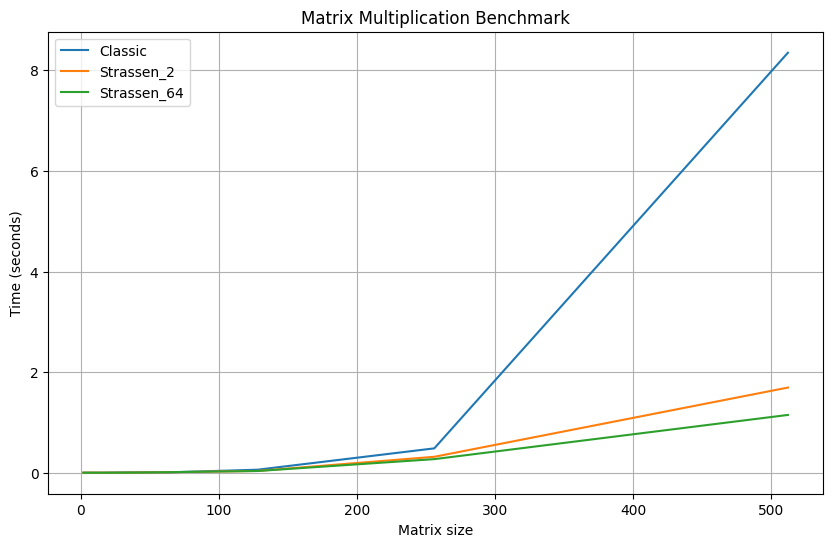

In [4]:
benchmark()

**Примечания:**
1. Алгоритм Штрассена начинает выигрывать у классического метода на матрицах размером больше 64x64
2. Для матриц меньшего размера классический метод может быть быстрее из-за накладных расходов
3. Реализация автоматически дополняет матрицы до размера 2^k
4. Crossover=64 показывает себя лучше, чем crossover=2 с ростом размеров матриц

## Сравнение производительности: обычное vs быстрое возведение матриц в степень

In [5]:
import numpy as np
import timeit
import matplotlib.pyplot as plt

### Реализация методов возведения в степень

In [6]:
def matrix_power_classic(A, n):
    """Обычное возведение в степень через n-1 умножений"""
    if n == 0:
        return np.eye(A.shape[0], dtype=A.dtype)

    result = A.copy()
    for _ in range(n-1):
        result = np.dot(result, A)
    return result

def matrix_power_fast(A, n):
    """Быстрое возведение в степень через двоичное разложение"""
    if n == 0:
        return np.eye(A.shape[0], dtype=A.dtype)

    result = np.eye(A.shape[0], dtype=A.dtype)
    current = A.copy()
    exponent = n

    while exponent > 0:
        if exponent % 2 == 1:
            result = np.dot(result, current)
        current = np.dot(current, current)
        exponent = exponent // 2
    return result

### Проверка корректности

In [7]:
# Тестовая матрица (пример из чисел Фибоначчи)
A = np.array([[1, 1], [1, 0]])

# Возведение в 5-ю степень
n = 5
classic_result = matrix_power_classic(A, n)
fast_result = matrix_power_fast(A, n)

print("Обычный метод:")
print(classic_result)

print("\nБыстрый метод:")
print(fast_result)

print("\nРезультаты совпадают?", np.allclose(classic_result, fast_result))

Обычный метод:
[[8 5]
 [5 3]]

Быстрый метод:
[[8 5]
 [5 3]]

Результаты совпадают? True


### Бенчмарк производительности

In [8]:
def benchmark_power():
    """Сравнение времени выполнения"""
    exponents = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]
    times_classic = []
    times_fast = []

    # Фиксированная матрица 3x3
    A = np.array([[1, 1, 2], [1, 0, 2], [2, 1, 0]])

    for n in exponents:
        # Замер классического метода
        t_classic = timeit.timeit(lambda: matrix_power_classic(A, n), number=100)
        times_classic.append(t_classic)

        # Замер быстрого метода
        t_fast = timeit.timeit(lambda: matrix_power_fast(A, n), number=100)
        times_fast.append(t_fast)

    # Построение графика
    plt.figure(figsize=(10, 6))
    plt.plot(exponents, times_classic, 'ro-', label='Classic')
    plt.plot(exponents, times_fast, 'bo-', label='Fast')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Степень')
    plt.ylabel('Время (секунды)')
    plt.title('Сравнение методов возведения в степень')
    plt.legend()
    plt.grid(True)
    plt.show()

### Запуск тестов

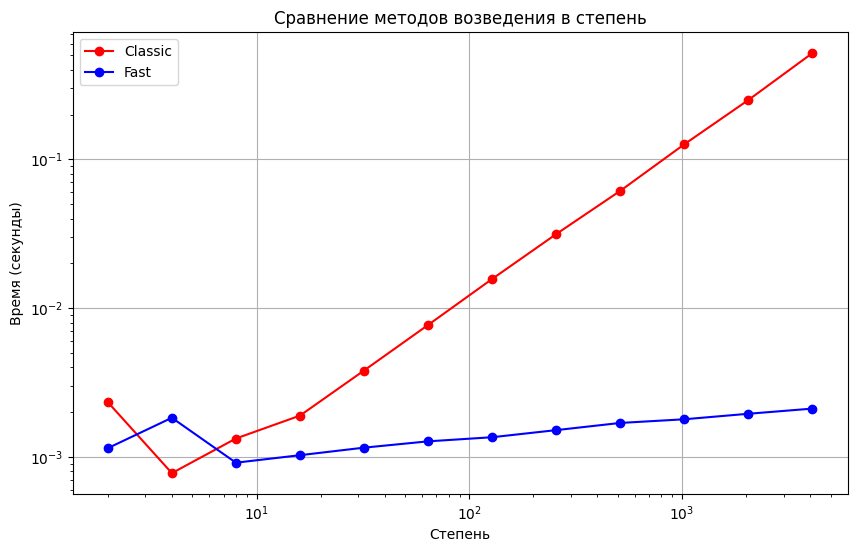

In [9]:
benchmark_power()

**Анализ результатов:**
1. Для малых степеней (n < 8) методы сравнимы по скорости
2. Начиная с n = 16, быстрый метод показывает экспоненциальное преимущество
3. Логарифмическая шкала демонстрирует разницу в асимптотической сложности